
Gravity Details

Acceleration of gravity at surface level:    9.7803 m/s²
Acceleration of gravity at  79.976 km (ASL): 9.5380 m/s²


Launch Site Details

Launch Date: 2024-09-11 12:00:00 UTC
Launch Site Latitude: 0.00000°
Launch Site Longitude: 0.00000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 0.1 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.976 km
Forecast Time Period: From  2024-09-10 18:00:00  to  2024-09-26 18:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 7.18 m/s
Surface Wind Direction: 187.43°
Surface Wind Heading: 7.43°
Surface Pressure: 1000.00 hPa
Surface Temperature: 296.57 K
Surface Air Density: 1.175 kg/m³
Surface Speed of Sound: 345.23 m/s


Earth Model Details

Earth Radius at Laun

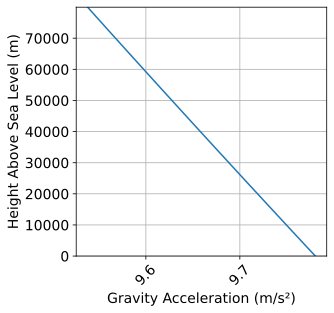



Atmospheric Model Plots


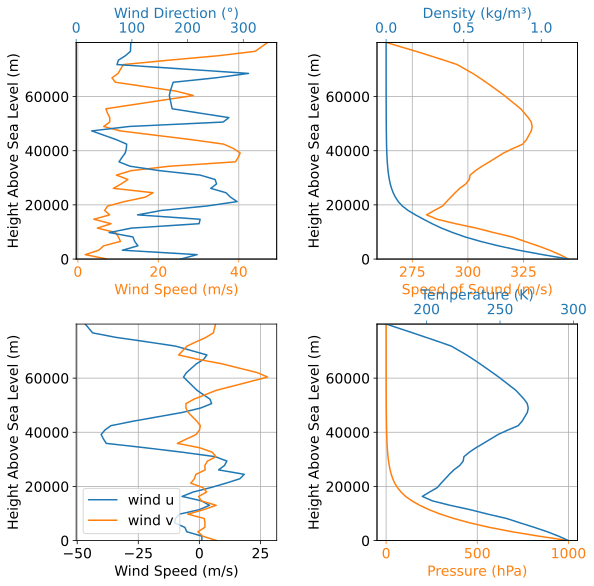

Rail Departure Velocity: 29.521 m/s


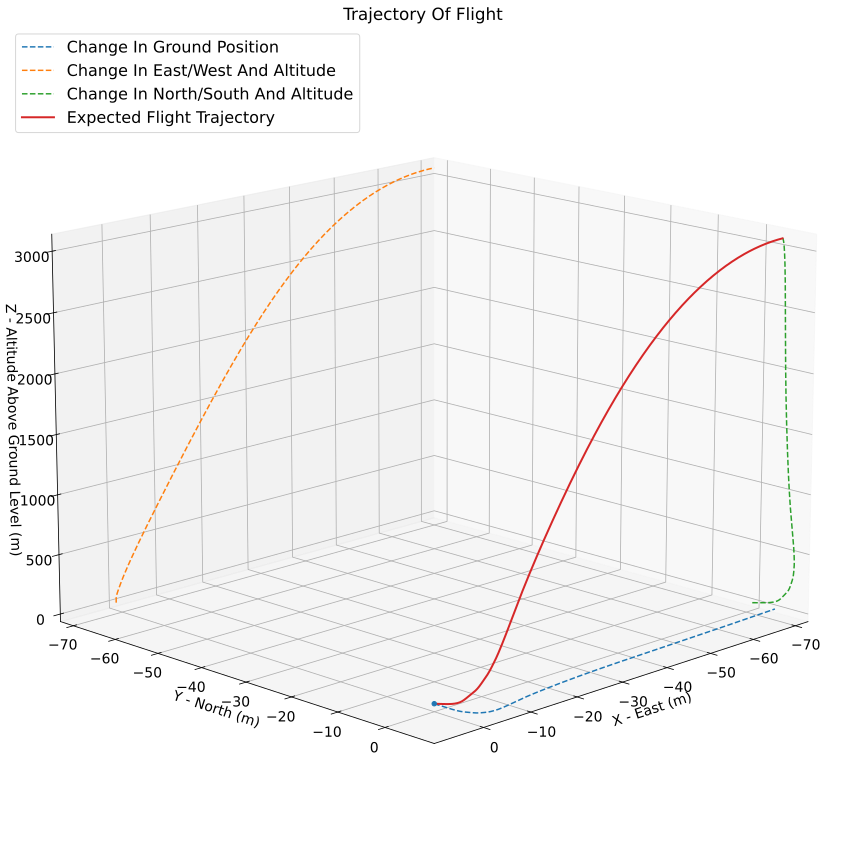

In [14]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

from time import process_time, time

import matplotlib  as mpl
import matplotlib.pyplot as plt
from IPython.display import display

import imageio.v2 as imageio
from matplotlib.patches import Ellipse

import ssl
import certifi

%config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt

from rocketpy.plots import flight_plots

%matplotlib inline
mpl.rcParams["figure.figsize"] = [8, 5]
mpl.rcParams["figure.dpi"] = 120
mpl.rcParams["font.size"] = 14
mpl.rcParams["legend.fontsize"] = 14
mpl.rcParams["figure.titlesize"] = 14

import numpy as np
from numpy.random import normal, choice

import openpyxl

# Define variable to load the dataframe
dataframe = openpyxl.load_workbook("WeatherData.xlsx")

# Define variable to read sheet
dataframe1 = dataframe.active

# Iterate the loop to read the cell values

env = Environment(latitude=0, longitude=0, elevation = 0)

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time
env.set_atmospheric_model(type="Forecast", file = "GFS")
# env.info()

M1850W = SolidMotor(
    thrust_source="AeroTech_M1850W.eng", #Thrustcurve.org Mike Haberer - Rock Sim, Also uploaded to Google
    dry_mass=6.032, #kg thrustcurve
    dry_inertia=(2, 2,0.254), #based off drawing
    nozzle_radius= 0.076 / 2 -0.003, # Part List
    grain_number=6, #Based on cross-section
    grain_density=6001.74, #Calculated mass of grain / volume of grain , for this i did - the core since it should be empty? not sure
    grain_outer_radius=47.49 / 1000 / 2, # Good
    grain_initial_inner_radius=9.525 / 1000, # Good
    grain_initial_height=0.076 , # Good
    grain_separation= 0 / 1000, # Good
    grains_center_of_mass_position=0 / 1000  ,
    center_of_dry_mass_position=0 / 1000,
    nozzle_position=0.37,#eyeballed
    burn_time=4.0,#Straight from thrustcurve.org
    throat_radius=11.56 / 1000 / 2 , # Part List
    coordinate_system_orientation="combustion_chamber_to_nozzle",
)

# M1850W.all_info()

#Pretty Much done except grain density and maybe nozzle position

SP = Rocket(
    mass = 15.276, #OpenRocket
    radius = 0.0775, #OpenRocket
    inertia = (8.76,8.76,0.099), # Calculated via Open Rocket
    coordinate_system_orientation = "nose_to_tail",
    center_of_mass_without_motor = 1.36, # OpenRocket
    power_off_drag ="CD_OFF_L3_Rocket.csv", #Uploaded to drive
    power_on_drag ="CD_ON_L3_Rocket.csv"#Uploaded to drive
)

SP.add_motor(M1850W, 2.4225)

nose_cone = SP.add_nose(
     length = 0.61, kind = "lvhaack", position = 0)

fin_set = SP.add_trapezoidal_fins(n=4,root_chord=0.305,tip_chord=0.127, span=0.162,position=2.333,cant_angle=0)

rail_buttons = SP.set_rail_buttons(
    upper_button_position=1.73,
    lower_button_position=1.73 + 0.888,
    angular_position=135
)

tail = SP.add_tail(
    top_radius=0.0775, bottom_radius=0.05, length=0.152, position=2.638
)

Drogue = SP.add_parachute(
    "Drogue",
    cd_s = 0.97*0.0731,
    trigger = "apogee"
)
Light = SP.add_parachute(
    "Light",
    cd_s = 2.2*1.169,
    trigger = "apogee"
)

testFlight = Flight(
    rocket=SP, environment=env,rail_length = 4.572,inclination = 85,heading = 0, terminate_on_apogee = True
)

# SP.all_info()
# M1850W.all_info()
env.all_info()
print("Rail Departure Velocity: {:.3f} m/s".format(testFlight.out_of_rail_velocity))
testFlight.plots.trajectory_3d()